<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_primoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [2]:
# Prendo i dati che mi servono dei ristoranti

#Osservazione: prendo il totale complessivo non il totale della categoria 

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'
american_restaurant = res['typology'] == 'American'
asian_restaurant = res['typology'] == 'Japanese'
mexican_restaurant = res['typology'] == 'Mexican'


# AMERICAN RESTAURANTS

totAmericanUsers_AmericanRestaurants = len(res[((american_restaurant) & (black_american)) | ((american_restaurant) & (white_american))])
totAsianUsers_AmericanRestaurants = len(res[(american_restaurant) & (asian)])
totMexicanUsers_AmericanRestaurants = len(res[(american_restaurant) & (mexican)])

# POSITIVI
# numero medio di positive sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
asian_american_positive = (len(res[(american_restaurant) & (asian) & (positive)]) * 100) / totAsianUsers_AmericanRestaurants
mexican_american_positive = (len(res[(american_restaurant) & (mexican) & (positive)]) * 100) / totMexicanUsers_AmericanRestaurants
american_american_positive = ((len(res[((american_restaurant) & (black_american) & (positive)) | 
                          ((american_restaurant) & (white_american) & (positive))])) * 100) / totAmericanUsers_AmericanRestaurants

# NEGATIVI
# numero medio di negative sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
asian_american_negative = (len(res[(american_restaurant) & (asian) & (negative)]) * 100) / totAsianUsers_AmericanRestaurants
mexican_american_negative = (len(res[(american_restaurant) & (mexican) & (negative)]) * 100) / totMexicanUsers_AmericanRestaurants
american_american_negative = ((len(res[((american_restaurant) & (black_american) & (negative)) | 
                          ((american_restaurant) & (white_american) & (negative))])) * 100) / totAmericanUsers_AmericanRestaurants

# NEUTRI
# numero medio di neutral sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
asian_american_neutral = (len(res[(american_restaurant) & (asian) & (neutral)]) * 100) / totAsianUsers_AmericanRestaurants
mexican_american_neutral = (len(res[(american_restaurant) & (mexican) & (neutral)]) * 100) / totMexicanUsers_AmericanRestaurants
american_american_neutral = ((len(res[((american_restaurant) & (black_american) & (neutral)) | 
                          ((american_restaurant) & (white_american) & (neutral))])) * 100) / totAmericanUsers_AmericanRestaurants



#---------------------------------------------------------------------------------------------------------------------------------------------


# ASIAN RESTAURANTS

totAmericanUsers_AsianRestaurants = len(res[((asian_restaurant) & (black_american)) | ((asian_restaurant) & (white_american))])
totAsianUsers_AsianRestaurants = len(res[(asian_restaurant) & (asian)])
totMexicanUsers_AsianRestaurants = len(res[(asian_restaurant) & (mexican)])


# POSITIVI
# numero medio di positive sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_asian_positive = ((len(res[((asian_restaurant) & (black_american) & (positive)) | 
                          ((asian_restaurant) & (white_american) & (positive))])) * 100) / totAmericanUsers_AsianRestaurants
asian_asian_positive = (len(res[(asian_restaurant) & (asian) & (positive)]) * 100) / totAsianUsers_AsianRestaurants
mexican_asian_positive = (len(res[(asian_restaurant) & (mexican) & (positive)]) * 100) / totMexicanUsers_AsianRestaurants


# NEGATIVI
# numero medio di negative sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_asian_negative = ((len(res[((asian_restaurant) & (black_american) & (negative)) | 
                          ((asian_restaurant) & (white_american) & (negative))])) * 100) / totAmericanUsers_AsianRestaurants
asian_asian_negative = (len(res[(asian_restaurant) & (asian) & (negative)]) * 100) / totAsianUsers_AsianRestaurants
mexican_asian_negative = (len(res[(asian_restaurant) & (mexican) & (negative)]) * 100) / totMexicanUsers_AsianRestaurants


# NEUTRI
# numero medio di neutral sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_asian_neutral = ((len(res[((asian_restaurant) & (black_american) & (neutral)) | 
                          ((asian_restaurant) & (white_american) & (neutral))])) * 100) / totAmericanUsers_AsianRestaurants
asian_asian_neutral = (len(res[(asian_restaurant) & (asian) & (neutral)]) * 100) / totAsianUsers_AsianRestaurants
mexican_asian_neutral = (len(res[(asian_restaurant) & (mexican) & (neutral)]) * 100) / totMexicanUsers_AsianRestaurants



#---------------------------------------------------------------------------------------------------------------------------------------------


# MEXICAN RESTAURANTS

totAmericanUsers_MexicanRestaurants = len(res[((mexican_restaurant) & (black_american)) | ((mexican_restaurant) & (white_american))])
totAsianUsers_MexicanRestaurants = len(res[(mexican_restaurant) & (asian)])
totMexicanUsers_MexicanRestaurants = len(res[(mexican_restaurant) & (mexican)])


# POSITIVI
# numero medio di positive sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_mexican_positive = ((len(res[((mexican_restaurant) & (black_american) & (positive)) | 
                          ((mexican_restaurant) & (white_american) & (positive))])) * 100) / totAmericanUsers_MexicanRestaurants
asian_mexican_positive = (len(res[(mexican_restaurant) & (asian) & (positive)]) * 100) / totAsianUsers_MexicanRestaurants
mexican_mexican_positive = (len(res[(mexican_restaurant) & (mexican) & (positive)]) * 100) / totMexicanUsers_MexicanRestaurants


# NEGATIVI
# numero medio di negative sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_mexican_negative = ((len(res[((mexican_restaurant) & (black_american) & (negative)) | 
                          ((mexican_restaurant) & (white_american) & (negative))])) * 100) / totAmericanUsers_MexicanRestaurants
asian_mexican_negative = (len(res[(mexican_restaurant) & (asian) & (negative)]) * 100) / totAsianUsers_MexicanRestaurants
mexican_mexican_negative = (len(res[(mexican_restaurant) & (mexican) & (negative)]) * 100) / totMexicanUsers_MexicanRestaurants


# NEUTRI
# numero medio di neutral sentiment di utenti asiatici, messicani e americani sul totale della rispettiva etnia
american_mexican_neutral = ((len(res[((mexican_restaurant) & (black_american) & (neutral)) | 
                          ((mexican_restaurant) & (white_american) & (neutral))])) * 100) / totAmericanUsers_MexicanRestaurants
asian_mexican_neutral = (len(res[(mexican_restaurant) & (asian) & (neutral)]) * 100) / totAsianUsers_MexicanRestaurants
mexican_mexican_neutral = (len(res[(mexican_restaurant) & (mexican) & (neutral)]) * 100) / totMexicanUsers_MexicanRestaurants



100.00000000000001
99.99999999999999
100.0


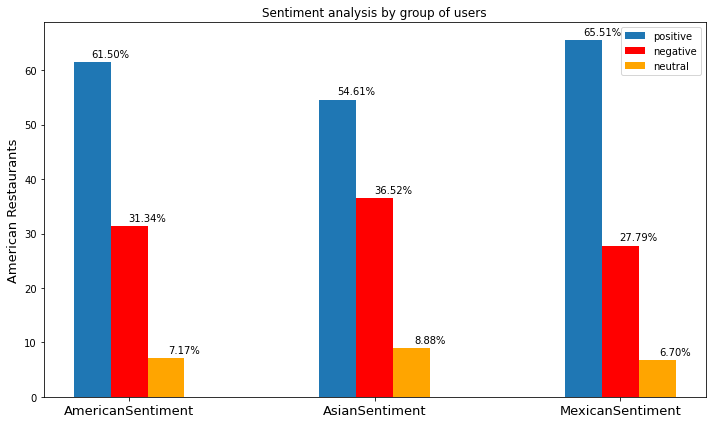

In [3]:
# Costruisco il grafico

labels = ['AmericanSentiment', 'AsianSentiment', 'MexicanSentiment']

# GRAFICO PER RISTORANTI AMERICANI

americanPositive = [american_american_positive, asian_american_positive, mexican_american_positive]
americanNegative = [american_american_negative, asian_american_negative, mexican_american_negative]
americanNeutral = [american_american_neutral, asian_american_neutral, mexican_american_neutral]

print(american_american_positive + american_american_negative + american_american_neutral)
print(asian_american_positive + asian_american_negative + asian_american_neutral)
print(mexican_american_positive + mexican_american_negative + mexican_american_neutral)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, americanPositive, width, label='positive')
rects2 = ax.bar(x, americanNegative, width, label='negative', color='red')
rects3 = ax.bar(x + width, americanNeutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('American Restaurants', fontsize = 13)
ax.set_title('Sentiment analysis by group of users')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

100.0
100.0
100.0


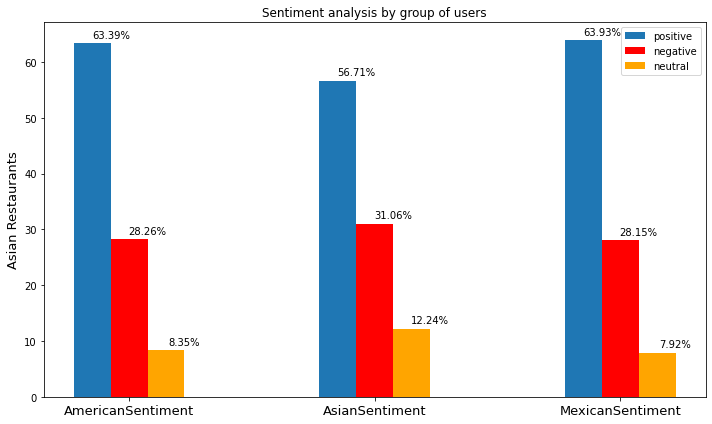

In [4]:
# Costruisco il grafico

labels = ['AmericanSentiment', 'AsianSentiment', 'MexicanSentiment']

# GRAFICO PER RISTORANTI ASIATICI

# valori barre
asianPositive = [american_asian_positive, asian_asian_positive, mexican_asian_positive]
asianNegative = [american_asian_negative, asian_asian_negative, mexican_asian_negative]
asianNeutral = [american_asian_neutral, asian_asian_neutral, mexican_asian_neutral]

print(american_asian_positive + american_asian_negative + american_asian_neutral)
print(asian_asian_positive + asian_asian_negative + asian_asian_neutral)
print(mexican_asian_positive + mexican_asian_negative + mexican_asian_neutral)


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, asianPositive, width, label='positive')
rects2 = ax.bar(x, asianNegative, width, label='negative', color='red')
rects3 = ax.bar(x + width, asianNeutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Asian Restaurants', fontsize = 13)
ax.set_title('Sentiment analysis by group of users')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 13)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

100.0
100.0
100.00000000000001


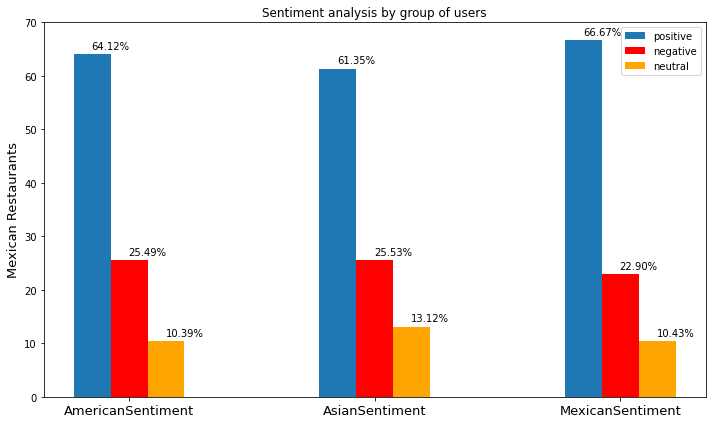

In [5]:
# Costruisco il grafico

labels = ['AmericanSentiment', 'AsianSentiment', 'MexicanSentiment']

# GRAFICO PER RISTORANTI MESSICANI

mexicanPositive = [american_mexican_positive, asian_mexican_positive, mexican_mexican_positive]
mexicanNegative = [american_mexican_negative, asian_mexican_negative, mexican_mexican_negative]
mexicanNeutral = [american_mexican_neutral, asian_mexican_neutral, mexican_mexican_neutral]

print(american_mexican_positive + american_mexican_negative + american_mexican_neutral)
print(asian_mexican_positive + asian_mexican_negative + asian_mexican_neutral)
print(mexican_mexican_positive + mexican_mexican_negative + mexican_mexican_neutral)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mexicanPositive, width, label='positive')
rects2 = ax.bar(x, mexicanNegative, width, label='negative', color='red')
rects3 = ax.bar(x + width, mexicanNeutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mexican Restaurants', fontsize = 13)
ax.set_title('Sentiment analysis by group of users')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 13)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()